# Data Visualization with Python

This week we are going to extend the visualization examples from last time. Python has plenty of pre-coded visualizations coming in different packages. A list of the most important graphics, alongside with pointers to their code and exampls, is founud here: https://python-graph-gallery.com

Python provides several packages for visualiztion: https://blog.modeanalytics.com/python-data-visualization-libraries. 

The most important ones probably are:
* Seaborn: https://seaborn.pydata.org (standard statistical graphics)
* Boketh: https://bokeh.pydata.org/en/latest (simple interactive visualiztions)
* ggplot: http://ggplot.yhathq.com

In this tutorial we are going to use **Seaborn**, since it provides most of the stuff we will need in the course and is very simple to use. For more sophisticated visualizations that go beyond these libraries, please check the Java Script libraries D3 (https://d3js.org) or Processing (https://processing.org) for Java.

### This notebook we will look at **Univariate plots**

## Exploratory Data Analysis

First, we will import some data. Let's import the `titanic.csv` data set as csv into a pandas dataframe. 

**Tip**, here is how you import any csv file: 

`
import pandas as pd
df = pd.read_csv('myFile.csv')
`

In [25]:
import pandas as pd
df = pd.read_csv('titanic.csv')

### Simple Measures (repetition)

The next few excercises are meant a repetition of previous content. You can start by exploring a data set by getting some very simple measures on all the columns. 


_1) In the following, calculate the min, max, and mean on each column with a numeric (quantiative) value._

**Tip**: here is how you select an entire row in pandas: 
`
df['columnName']
`

**Tip**: here is how you calculate a value on an entire row in your dataframe:

`
np.mean(df['myColumn'])
`

Note that you first need to import the `numpy` package. 

Print the results in the following format: 

> Max 'Survived': 512.32920000000001

In [26]:
import numpy as np

print(list(df.columns))
# print(df.dtypes)

def print_result(dataframe, col_name):
    print("column {}:\nmax: {}, mean: {}, min: {}".format(col_name, 
                                                     np.max(df[col_name]), 
                                                     np.mean(df[col_name]), 
                                                     np.min(df[col_name])
                                                    ))
print_result(df, "Survived")
print_result(df, "Age")
print_result(df, "Siblings/Spouses Aboard")
print_result(df, "Parents/Children Aboard")
print_result(df, "Fare")

['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
column Survived:
max: 1, mean: 0.3855693348365276, min: 0
column Age:
max: 80.0, mean: 29.471443066516347, min: 0.42
column Siblings/Spouses Aboard:
max: 8, mean: 0.5253664036076663, min: 0
column Parents/Children Aboard:
max: 6, mean: 0.3833145434047351, min: 0
column Fare:
max: 512.3292, mean: 32.30542018038328, min: 0.0


_2) Can you calculate how may males and females have been on board?_

**Tip**: filtering rows works like so
`
newDataFrame = df[df['columnName'] == value]
`

**Tip**: Counting rows for a dataframe `df` goes like so:
`
df.shape[0] # > rows
df.shape[1] # > columns
`


In [27]:
print("number of male onboard:", df[df["Sex"] == "male"].shape[0])
print("number of female onboard:", df[df["Sex"] == "female"].shape[0])

number of male onboard: 573
number of female onboard: 314


_3) Can you print the min age of all male vs. female?_

**Tip**: Create a new dataframe for each gender: one for male and one for female, then get the mean values for the ages.
`
newDataFrame = df[oldDataFrame.loc['columnName']==value]
`

In [28]:
import timeit # time the command
#%timeit print("min age of all male:", np.min(df[df["Sex"] == "male"]["Age"]))
print("mean age of all male:", np.mean(df[df.loc[:, 'Sex']== 'male']["Age"]))
print("mean age of all female:", np.mean(df[df.loc[:, 'Sex']== 'female']["Age"]))


mean age of all male: 30.431361256544506
mean age of all female: 27.719745222929937


### Distribution Plots

Having refreshed some of the knowledge about filtering rows and columns, we can now start plotting some of the data with the Seaborn package. 

There is settings that we have to set in order to use searborn properly with jupyter. We need to tell python to render graphics _inline_. By default, python (and jupyter) will generate a separate .png for each chart you're creating. However, we want charts to be shown inside the python notebook, i.e. below. To do this, simply tell python the following in the beginning of your code: 

`%matplotlib inline`  (keep the '%' at the beginning!)

**Note**, in some examples, python throws _warnings_ which are written on a red background. You can ignore them in this tutorial as all examples work fine and you should be able to see the charts

Last, you need to import the `seaborn` package. The standard abbreviation is `sns`. The below code shows you the distribution of a set of numbers.

`import seaborn as sns                       # this imports the seaborn package
%matplotlib inline                           # tells python to show charts inline (very important)
chart = sns.distplot([0,1,1,1,5,5,8,8,10])   # the distplot function of the seaborn (sns) package creates a chart 
chart.set_title('Some distribution of numbers')    # Gives the chart a title
sns.plt.show()                              # shows the plot`

4) Try it with alteringn numbers (don't forgt '`%matplotlib inline`') 


D:\Anacoda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


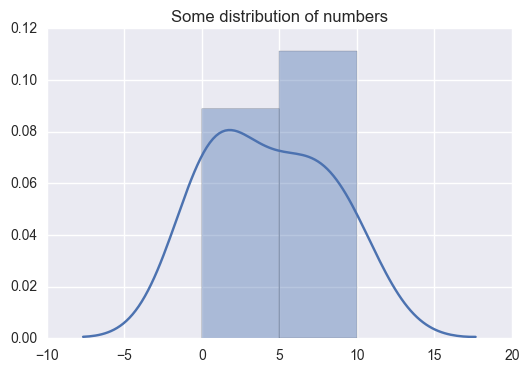

In [29]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid") # set aesthetics
sns.set(color_codes=True)

chart = sns.distplot([0,1,1,1,5,5,8,8,10])
chart.set_title('Some distribution of numbers')
plt.show() # over-written by %matplotlib inline

In the distribution plot, we see our data values on he x-axis, and their frequency on the y-axis.

_5) Plot the distribution of age for all passengers, including a title._

**Tip** Instead of an array of numbers you want to pass a column in the dataframe: df['columnnamehere']

D:\Anacoda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


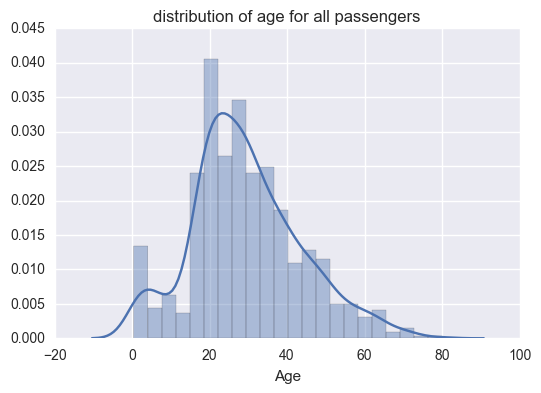

In [30]:
chart = sns.distplot(df["Age"])
chart.set_title('distribution of age for all passengers')
plt.show()

What do you observe? Note down 3 observations in the field below.
The following field used the markdown language (https://en.wikipedia.org/wiki/Markdown) used in Wikipedia. Create a bullet point list like so: 

1. There are two preaks, one is at around age 19-22, and the other is around 25-27.
2. Majority of passageers are between age 20 to age 40.
3. There are many infants/children on board.

_6) Plot the distribution of age and fares for male and female passangers separtely._

Again, put titles on all of your charts, otherwise you will get confused quickly.

D:\Anacoda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


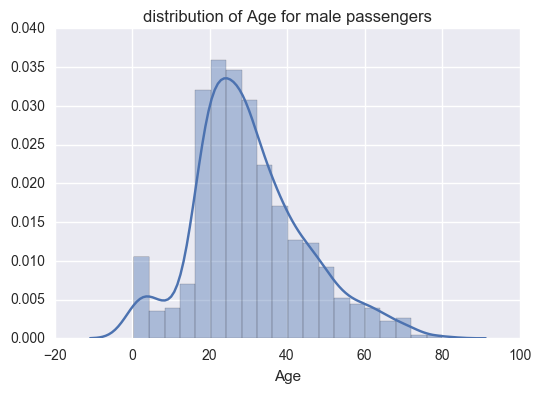

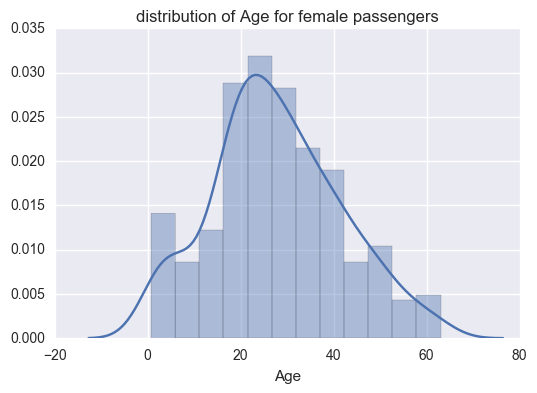

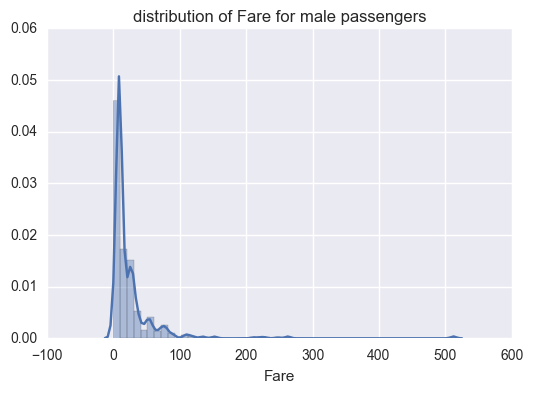

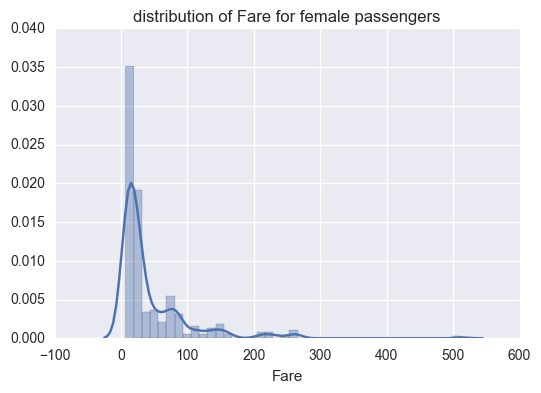

In [31]:
chart = sns.distplot(df[df.loc[:, 'Sex']== 'male']["Age"])
chart.set_title('distribution of Age for male passengers')
plt.show()

chart = sns.distplot(df[df.loc[:, 'Sex']== 'female']["Age"])
chart.set_title('distribution of Age for female passengers')
plt.show()

chart = sns.distplot(df[df.loc[:, 'Sex']== 'male']["Fare"])
chart.set_title('distribution of Fare for male passengers')
plt.show()

chart = sns.distplot(df[df.loc[:, 'Sex']== 'female']["Fare"])
chart.set_title('distribution of Fare for female passengers')
plt.show()

### Laying out charts

The above example should have plotted you all charts vertically, which is hard to read. To layout charts properly, try using the `plt.subplots`, to create a 2x2 layout grid:

`
f, axes = sns.plt.subplots(2, 2, figsize=(7, 7), sharex=True)
`

You can then place your charts into this grid using the `ax=axes[x,y]` attribute on the `distplot` function.

`
sns.distplot( df["sepal_length"] , ax=axes[0, 0])   # top (0) left (0)
sns.distplot( df["sepal_width"] , ax=axes[0, 1])    # top (0) right (1)
sns.distplot( df["petal_length"] , ax=axes[1, 0])   # bottom (1) left (0)
sns.distplot( df["petal_width"] , ax=axes[1, 1])    # bottom (1) right (1)
sns.plt.show()
`

7) Can you plot the above charts (male, female ages) in a 2 x 2 grid?

D:\Anacoda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


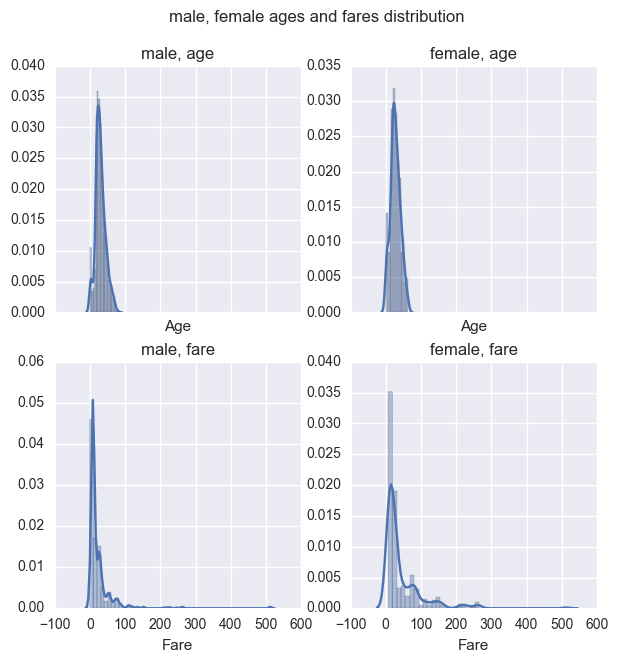

In [32]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
ax1 = sns.distplot(df[df.loc[:, 'Sex']== 'male']["Age"], ax=axes[0,0])
ax2 = sns.distplot(df[df.loc[:, 'Sex']== 'female']["Age"], ax=axes[0,1])
ax3 = sns.distplot(df[df.loc[:, 'Sex']== 'male']["Fare"], ax=axes[1,0])
ax4 = sns.distplot(df[df.loc[:, 'Sex']== 'female']["Fare"], ax=axes[1,1])

plt.suptitle('male, female ages and fares distribution')
ax1.set_title('male, age')
ax2.set_title('female, age')
ax3.set_title('male, fare')
ax4.set_title('female, fare')
plt.show()

### Adjusting axes

The above charts are hard to compare. Not just because the data is two different charts (and your eyes must wander), but because the axis are optimized to best show the plot! This means that x and y axis can have totally different scales across different charts, depending on the data. E.g. in my case, the max value on the male age x-axis is 100, while the same value in the female chart is 80!

Similar, in the fare charts, they y-axis is showing different values (.035 for female, .05 for male).

Eventually, my charts show values smaller than '0' which does not make sense for both age and fare. 

Thus, seaborn plots can be confusing at a first glance. We can overcome these problems by telling seaborn the ranges we want to see on each axis. There are two simple methods: 

`
sns.plt.ylim(10, 40)  # sets the min (e.g. 10) and max (e.g. 40) for the y-axis.
sns.plt.ylim(10, 40)  # sets the min (e.g. 10) and max (e.g. 40) for the y-axis.
`

8) Can you replot the two charts ages (male and female) with the same axes values and without negative values? Be careful to chose the 'right values'.

D:\Anacoda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


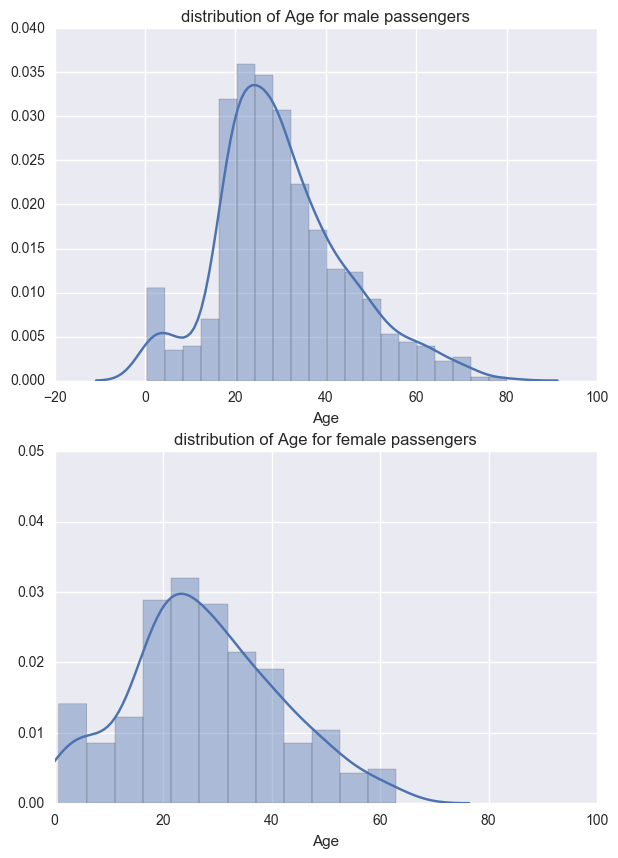

In [33]:
f, axes = plt.subplots(2, figsize=(7, 10), sharex=False)
plt.xlim(0, 100)
plt.ylim(0, 0.05)
sns.distplot(df[df.loc[:, 'Sex']== 'male']["Age"], ax=axes[0])
axes[0].set_title('distribution of Age for male passengers')
sns.distplot(df[df.loc[:, 'Sex']== 'female']["Age"], ax=axes[1])
axes[1].set_title('distribution of Age for female passengers')
plt.show()

### Plotting several data sets into the same plot

Exact comparison might still be tricky, at least the reader might not understand the differences you want to higlight. 

The most convenient way is to plot both data into the same chart. Simply call `sns.plt.show()` after you have created all your charts. When you create a chart with 

`
sns.distplot([1,2,3,4,5])
`

Python keeps the cart in memory but does not create the png. When you create another chart, python simply puts that new chart 'on top of' the other one. 

9) Can you plot both (male and female) distribution within the same chart? Be careful to chose an informative title.

D:\Anacoda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


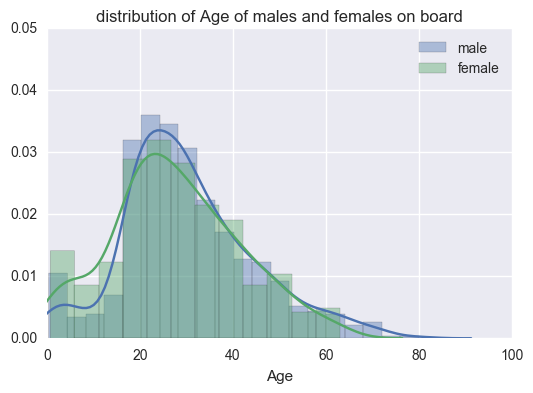

In [34]:
ax1 = sns.distplot(df[df.loc[:, 'Sex']== 'male']["Age"], label = "male")
ax2 = sns.distplot(df[df.loc[:, 'Sex']== 'female']["Age"], label = "female")
ax1.set_title("distribution of Age of males and females on board")
plt.xlim(0, 100)
plt.ylim(0, .05)
plt.legend() # https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot
plt.show()

What do you observe? Note down 2 obersvations: 

The distributions of male and female passangers are similar.
Female passangers under 20 are more than males.

10) Chose some other columns from the data field and show their distributions, e.g. classes, number of relatives, and fares and plot. What do you see?

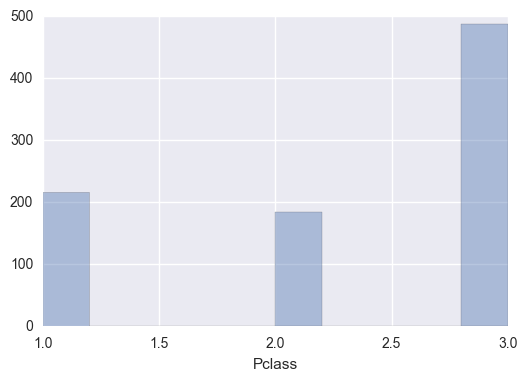

In [61]:
# classes
chart1 = sns.distplot(df["Pclass"], kde=False)
plt.show()

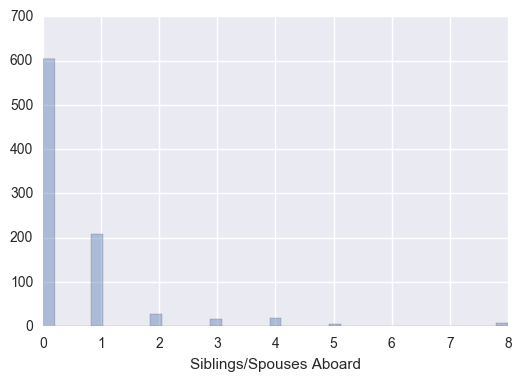

In [64]:
# number of relatives
chart2 = sns.distplot(df["Siblings/Spouses Aboard"], kde=False)
plt.show()

D:\Anacoda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


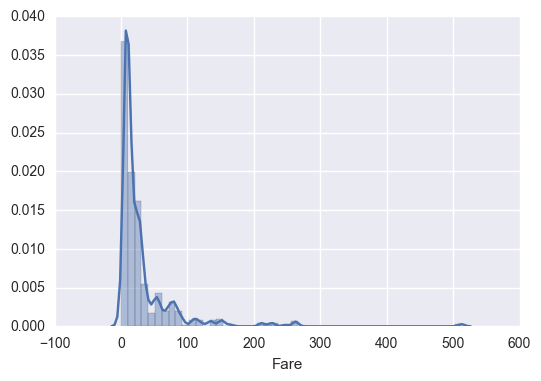

In [70]:
# fares
df.head()
chart3 = sns.distplot(df["Fare"])
plt.show()

11) Remember from week2 how to filter rows conditionally; plot some distributions for, e.g. age of women who survived vs. age of woman who did not survive. 

D:\Anacoda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


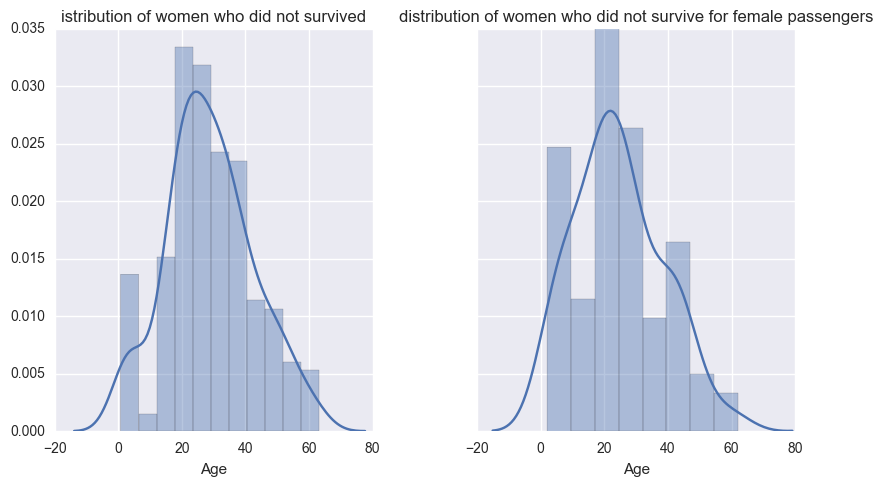

In [87]:
f, axes = plt.subplots(figsize=(9, 5), nrows=1, ncols=2, sharey=True)
sns.distplot(df[(df["Sex"] == "female") & (df["Survived"] == 1)]["Age"], ax=axes[0])
axes[0].set_title('istribution of women who did not survived')
sns.distplot(df[(df["Sex"] == "female") & (df["Survived"] == 0)]["Age"], ax=axes[1])
axes[1].set_title('distribution of women who did not survive for female passengers')
plt.tight_layout()
plt.show()

# sub1 = sns.distplot(df[(df["Sex"] == "female") & (df["Survived"] == 1)]["Age"], label="survived")
# sub1.set_title('distribution of women who did not survived')
# sub2 = sns.distplot(df[(df["Sex"] == "female") & (df["Survived"] == 0)]["Age"], label="not survived")
# sub2.set_title('distribution of women who did have/not survived')
# plt.legend()
# plt.tight_layout()
# plt.show()